Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Joram Erbarth"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [38]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

#the function takes three numbers as input and returns the median of the three numbers
def median(x1, x2, x3):
    #check if x2 is median
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    #check if x3 is median
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        #stores all sublists
        (frm, to) = indices.pop()
        #continues if list has length 1 
        if frm == to:
            continue

        # Find the partition:
        #length of sublist
        N = to - frm
        #select 3 ind from the middle of sublist
        inds = [frm + int(N * n) for n in locations]
        #select values from inds
        values = [lst[ind] for ind in inds]
        #select median values 
        partition = median(*values)

        # Split into lists:
        #sort greater than less than or equal to partition value 
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        #define ind for new sublist 
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    #creates list with N numbers and shuffles them radomly. Sorts list with qsort
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    #checks if sortin is correct
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.1418057000000772


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

One of the main differences is that the textbook implementation chooses a random pivot. The code randomizes the through shuffling the list before applying qsort. Further, the code stores the third list with values equal to the pivot. The textbook just divides into 2 lists. Another difference is that the textbook algorithm is recursive, while the code is iterative. 

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

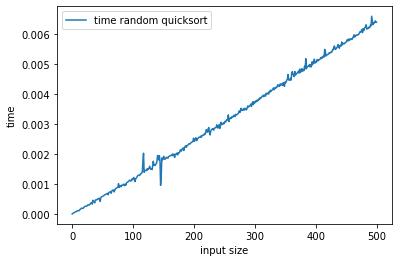

In [39]:
time = []
for i in range(500):
    N = i
    t = 0
    for i in range(100):
        t += timeit.timeit(randomized_quicksort, number=1)
    time.append(t/100)
    
        
        
        
    
import matplotlib.pyplot as plt

#plot time over input size 
plot_1 = plt.plot([i for i in range(500)],time, label="time random quicksort")
plt.legend()
plt.xlabel("input size")
plt.ylabel("time")
plt.show()   
    

It seems like quicksort is running in average time O(nlogn)

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [40]:
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        #stores all sublists
        (frm, to) = indices.pop()
        #continues if list has length 1 
        if frm == to:
            continue

        # Find the partition:
        #length of sublist
        N = to - frm
        #select 3 ind from the middle of sublist
        inds = [frm + int(N * n) for n in locations]
        #select values from inds
        values = [lst[ind] for ind in inds]
        #select median values 
        partition = median(*values)

        # Split into lists:
        #sort greater than less than or equal to partition value 
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        #counts = sum([1 for a in lst[frm:to] if a == partition])
        #define ind for new sublist 
        ind1 = frm + len(lower)
        ind2 = ind1 + 1    #counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1] = partition
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst
    

In [41]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

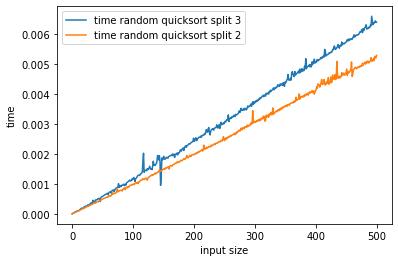

In [42]:
time2 = []
for i in range(500):
    N = i
    t2 = 0
    for i in range(100):
        t2 += timeit.timeit(randomized_quicksort, number=1)
    time2.append(t2/100)
    
        
        
        
    
import matplotlib.pyplot as plt

#plot time over input size 
plt.plot([i for i in range(500)],time, label="time random quicksort split 3")
plt.plot([i for i in range(500)],time2, label="time random quicksort split 2")
plt.legend()
plt.xlabel("input size")
plt.ylabel("time")
plt.show()   

We can see that the algorithm with 2 splits is faster. This is the case because checking for numbers takes constant time and does not lead to any advantages in this example because all numbers are distinct. 

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [43]:
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        #stores all sublists
        (frm, to) = indices.pop()
        #continues if list has length 1 
        if frm == to:
            continue

        # Find the partition:
        #length of sublist
        #N = to - frm
        #select 3 ind from the middle of sublist
        #inds = [frm + int(N * n) for n in locations]
        #select values from inds
        #values = [lst[ind] for ind in inds]
        #select median values 
        partition = lst[frm]

        # Split into lists:
        #sort greater than less than or equal to partition value 
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        #define ind for new sublist 
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [44]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



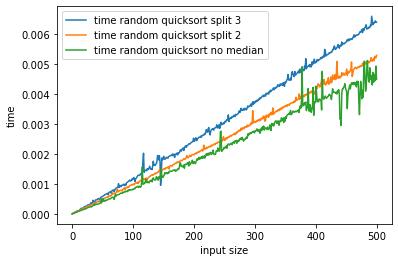

In [49]:
time3 = []
for i in range(500):
    N = i
    t3 = 0
    for i in range(100):
        t3 += timeit.timeit(randomized_quicksort, number=1)
    time3.append(t3/100)
    
        
        
        
    
import matplotlib.pyplot as plt

#plot time over input size 
plt.plot([i for i in range(500)],time, label="time random quicksort split 3")
plt.plot([i for i in range(500)],time2, label="time random quicksort split 2")
plt.plot([i for i in range(500)],time3, label="time random quicksort no median")
plt.legend()
plt.xlabel("input size")
plt.ylabel("time")
plt.show()

We can see that the algorithm runs faster without taking the median. Taking the median requires additional constant time and does not lead to any advantages here.

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


We assume, that in the end, ever sublist of the list has a length of 1. So we have n lists in the last branch of the tree. Further we assume that the algorithm runs in average time and splits every list into two lists. At evey level, the number of lists doubles. So first we have 1 split then 2 splits then 4 and so on. At some point we have 1+2+4+8+32+64+128+256 =511 splits. We can only do 500 splits becasause each splits leads to a recursion. So at the last level we can have 256-11 = 245 splits. Each split leads to two new lists so we have 490 lists after the last split. If no further splits are made the list has 490 elements to beginn with. This is the maximum length to have 500 or less recursions. 